# Instalando Bibliotecas

In [ ]:
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import pandas as pd
from uszipcode import SearchEngine

df = pd.read_csv('/content/kc_house_data.csv')

## Outras Configurações

In [ ]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='viridis',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

pd.set_option('display.precision',2)

# Tratando os Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Excluindo Dados irrelevantes

In [ ]:
# Remoção de variáveis irrelevantes
df.drop(['sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15','waterfront','view'], axis=1, inplace=True)

## Formatando Dados

In [ ]:
# Formatando a data
df['date'] = df.date.str.rstrip('T000000')

In [ ]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

In [ ]:
# Transformando floors(Andares) em números inteiros.
df['floors'] = df['floors'].astype('int')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1,3,7,1955,0,98178
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2,3,7,1951,1991,98125
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1,3,6,1933,0,98028
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1,5,7,1965,0,98136
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1,3,8,1987,0,98074


# Informações Adicionais (insights)

## Cidades

In [ ]:
# Encontrando as cidades de acordo com o Zipcode(CEP)
engine = SearchEngine()

df['city'] = 'NaN'
for index, row in df.iterrows():
  zipcode = engine.by_zipcode(row['zipcode'])
  df.loc[index,'city'] =  zipcode.major_city

Exception ignored in: <function SearchEngine.__del__ at 0x7f7aa61f9d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.8/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 1811, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 1853, in _close_impl
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/orm/session.py", line 923, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2416, in close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2639, in _do_close
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2625, in _close_impl
  File "/usr/local/lib/python3.8/dist-packages/sqlalchemy/engine/base.py", line 2617, in _connection_rollback_impl
  File "/usr/lo

In [ ]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1,3,7,1955,0,98178,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2,3,7,1951,1991,98125,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1,3,6,1933,0,98028,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1,5,7,1965,0,98136,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1,3,8,1987,0,98074,Sammamish


## Preço por m² Ára Habitavel e Terreno

In [ ]:
# Preço do imóvel dividido pela área habitavel e área do terreno.
df['preco_area'] = df['price'] / df['sqft_living']
df['preco_terreno'] = df['price'] / df['sqft_lot']

In [ ]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,city,preco_area,preco_terreno
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1,3,7,1955,0,98178,Seattle,188.05,39.27
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2,3,7,1951,1991,98125,Seattle,209.34,74.29
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1,3,6,1933,0,98028,Kenmore,233.77,18.00
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1,5,7,1965,0,98136,Seattle,308.16,120.80
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1,3,8,1987,0,98074,Sammamish,303.57,63.12


## Valorização ou Desvalorização dos imóveis (Maio de 2014 até Maio de 2015)

In [ ]:
# O DataFrame foi ordenado pelos id que se repetem (Vendas que ocorreram mais de um vez)
ids = df['id']
df = df[ids.isin(ids[ids.duplicated()])].sort_values("id")
df = df.sort_values(['id','date']).reset_index(drop=True)

# Foi criado duas colunas vazias para que os valores fossem adicionados.
df['valorization'] = np.zeros(df.shape[0])
df['hold_time'] = np.zeros(df.shape[0])

In [ ]:
# Nesse for foi ultilizado os INDEXs e IDs para identificação dos imóveis que tiveram valorização
# E ele retorna os valores de valorização(Ou Desvalorização) e também o quantidade de dias que o imoveis levou para ser revendido.
for index in range(1, int(df.shape[0])):
  if df.iloc[index]['id']==df.iloc[index-1]['id']:
    df.at[index,'valorization'] = df.iloc[index]['price'] - df.iloc[index-1]['price']
    df.at[index,'hold_time'] = (df.iloc[index]['date'] - df.iloc[index-1]['date']).days

In [ ]:
# Calculando a %(porcentagem) de valorização de cada imóvel
df['valorization_percent'] = 'NaN'
df['valorization_percent'] = df['valorization'] / df['price']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,city,preco_area,preco_terreno,valorization,hold_time,valorization_percent
0,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2,3,7,1991,0,98002,Auburn,116.67,29.87,0.0,0.0,0.00
1,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2,3,7,1991,0,98002,Auburn,125.00,32.01,20000.0,218.0,0.07
2,7200179,2014-10-16,150000.0,2,1.00,840,12750,1,3,6,1925,0,98055,Renton,178.57,11.76,0.0,0.0,0.00
3,7200179,2015-04-24,175000.0,2,1.00,840,12750,1,3,6,1925,0,98055,Renton,208.33,13.73,25000.0,190.0,0.14
4,109200390,2014-08-02,245000.0,3,1.75,1480,3900,1,4,7,1980,0,98023,Federal Way,165.54,62.82,0.0,0.0,0.00


# A limpeza dos Dados

## Renomeando Colunas

In [ ]:
df = df.rename(columns = {
    'date':'data',
    'price':'preço',
    'bedrooms':'quartos',
    'bathrooms':'banheiros',
    'condition':'condição',
    'sqft_living':'area_habitavel',
    'sqft_lot':'tamanho_terreno',
    'floors':'andares',
    'grade':'material_construção',
    'yr_built':'ano_construção',
    'yr_renovated':'ano_renovação',
    'city':'cidade',
    'valorization':'valorização',
    'hold_time':'tempo_revenda',
    'valorization_percent':'percentual_valorização',
    'preco_area':'preço_area',
    'preco_terreno':'preço_terreno'
}
)

In [ ]:
df.head()

,id,data,preço,quartos,banheiros,area_habitavel,tamanho_terreno,andares,condição,material_construção,ano_construção,ano_renovação,zipcode,cidade,preço_area,preço_terreno,valorização,tempo_revenda,percentual_valorização
0,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2,3,7,1991,0,98002,Auburn,116.67,29.87,0.0,0.0,0.00
1,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2,3,7,1991,0,98002,Auburn,125.00,32.01,20000.0,218.0,0.07
2,7200179,2014-10-16,150000.0,2,1.00,840,12750,1,3,6,1925,0,98055,Renton,178.57,11.76,0.0,0.0,0.00
3,7200179,2015-04-24,175000.0,2,1.00,840,12750,1,3,6,1925,0,98055,Renton,208.33,13.73,25000.0,190.0,0.14
4,109200390,2014-08-02,245000.0,3,1.75,1480,3900,1,4,7,1980,0,98023,Federal Way,165.54,62.82,0.0,0.0,0.00


## Valores Nulos

In [ ]:
# Não existem valores faltantes
df.isnull().sum()

id                        0
data                      0
preço                     0
quartos                   0
banheiros                 0
area_habitavel            0
tamanho_terreno           0
andares                   0
condição                  0
material_construção       0
ano_construção            0
ano_renovação             0
zipcode                   0
cidade                    0
preço_area                0
preço_terreno             0
valorização               0
tempo_revenda             0
percentual_valorização    0
dtype: int64

## Outliers

<AxesSubplot:xlabel='condição', ylabel='preço'>

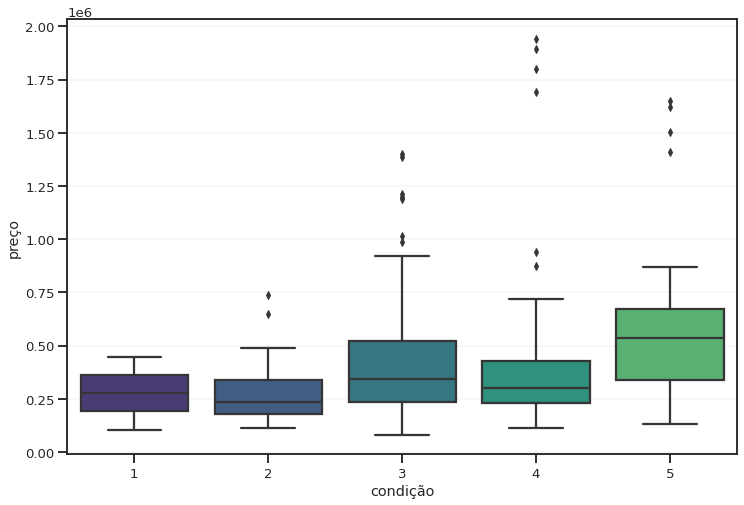

In [ ]:
# Valores outliers acima de 1 milhão (Fora dos valores médios)
sns.boxplot(data=df, x='condição', y='preço')

In [ ]:
# Removendo valores acima de 1M
imoveis1M = df[df['preço']>1000000.0].index
df.drop(imoveis1M, inplace=True, axis=0)

<AxesSubplot:xlabel='condição', ylabel='preço'>

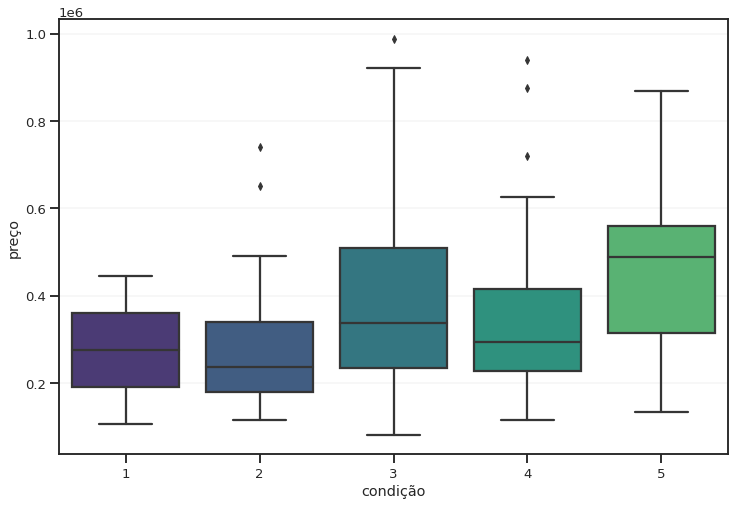

In [ ]:
sns.boxplot(data=df, x='condição', y='preço')

# A Exploração de Dados

## Quais as minhas métricas essencias ?

Acredito que as métricas essenciais serão respectivamente:

condição --> A condição que o imóvel se encontra

percentual_valorização --> O quanto o imóvel se valorizou em %

valorização --> O quanto o imóvel se valorizou

ano_construção --> O ano em que o imóvel foi construido

material_construção --> A qualidade do material que o imóvel foi construido







### Métrica de filtro: Valorização do imovel

In [ ]:
# Filtrando somente os imóveis que tiveram valorização ou desvalorização 
df = df[df['valorização']!=0]
df.head()

,id,data,preço,quartos,banheiros,area_habitavel,tamanho_terreno,andares,condição,material_construção,ano_construção,ano_renovação,zipcode,cidade,preço_area,preço_terreno,valorização,tempo_revenda,percentual_valorização
1,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2,3,7,1991,0,98002,Auburn,125.00,32.01,20000.0,218.0,0.07
3,7200179,2015-04-24,175000.0,2,1.00,840,12750,1,3,6,1925,0,98055,Renton,208.33,13.73,25000.0,190.0,0.14
5,109200390,2014-10-02,250000.0,3,1.75,1480,3900,1,4,7,1980,0,98023,Federal Way,168.92,64.10,5000.0,61.0,0.02
7,123039336,2014-12-08,244900.0,1,1.00,620,8261,1,3,5,1939,0,98106,Seattle,395.00,29.65,96900.0,180.0,0.40
9,251300110,2015-01-14,358000.0,3,2.25,2510,12013,2,3,8,1988,0,98003,Federal Way,142.63,29.80,133000.0,167.0,0.37


###Condição do Imóvel

In [ ]:
# Analisando média das variávies pela condição
df_group = df.groupby(['condição']).agg({'preço':'mean','quartos':'mean','banheiros':'mean','preço_area':'mean','preço_terreno':'mean','tempo_revenda':'mean','percentual_valorização':'mean'})
df_group

,preço,quartos,banheiros,preço_area,preço_terreno,tempo_revenda,percentual_valorização
condição,,,,,,,
1,445000.00,2.00,1.00,478.49,57.49,243.00,0.76
2,381118.75,3.00,1.31,314.77,54.09,149.12,0.36
3,443618.75,3.30,1.79,278.90,70.80,186.52,0.33
4,383995.84,3.03,1.61,266.74,43.15,166.26,0.31
5,564904.17,3.75,2.06,297.39,99.77,187.50,0.37


In [ ]:
# Filtrando somente os imóveis de condição 4
df_cond4 = df[df['condição']==4]
df_cond4.head()

,id,data,preço,quartos,banheiros,area_habitavel,tamanho_terreno,andares,condição,material_construção,ano_construção,ano_renovação,zipcode,cidade,preço_area,preço_terreno,valorização,tempo_revenda,percentual_valorização
5,109200390,2014-10-02,250000.0,3,1.75,1480,3900,1,4,7,1980,0,98023,Federal Way,168.92,64.10,5000.0,61.0,0.02
11,302000375,2015-05-06,250000.0,3,2.00,1050,18304,1,4,7,1953,0,98001,Auburn,238.10,13.66,80900.0,265.0,0.32
19,643300040,2015-03-13,719521.0,4,1.75,1920,9500,1,4,7,1966,0,98006,Bellevue,374.75,75.74,238521.0,129.0,0.33
27,726049190,2015-02-18,431000.0,3,1.00,1810,7200,1,4,7,1954,0,98133,Seattle,238.12,59.86,143500.0,139.0,0.33
38,1217000340,2015-02-19,340000.0,3,1.00,1840,8100,1,4,7,1953,0,98166,Seattle,184.78,41.98,155000.0,258.0,0.46


## Visulizando os Dados

In [ ]:
dfs = px.data.tips()
fig = px.box(df_cond4, x='condição',y='preço',hover_data=["preço_area"],width=600,height=400)
fig.show()

In [ ]:
fig = px.scatter(df_cond4, x="condição", y="preço",width=600,height=400)
fig.show()

In [ ]:
# Filtrando somente os imóveis abaixo de 340 mil dólares (abaixo da média)
df_cond4 = df_cond4[df_cond4['preço']<= 340000.00]
df_cond4.head()

,id,data,preço,quartos,banheiros,area_habitavel,tamanho_terreno,andares,condição,material_construção,ano_construção,ano_renovação,zipcode,cidade,preço_area,preço_terreno,valorização,tempo_revenda,percentual_valorização
5,109200390,2014-10-02,250000.0,3,1.75,1480,3900,1,4,7,1980,0,98023,Federal Way,168.92,64.10,5000.0,61.0,0.02
11,302000375,2015-05-06,250000.0,3,2.00,1050,18304,1,4,7,1953,0,98001,Auburn,238.10,13.66,80900.0,265.0,0.32
38,1217000340,2015-02-19,340000.0,3,1.00,1840,8100,1,4,7,1953,0,98166,Seattle,184.78,41.98,155000.0,258.0,0.46
46,1237500540,2014-12-22,270000.0,3,1.75,1370,10866,1,4,6,1945,0,98052,Redmond,197.08,24.85,45000.0,62.0,0.17
54,1432400120,2015-05-08,255000.0,3,1.00,1010,7690,1,4,6,1958,0,98058,Renton,252.48,33.16,90000.0,178.0,0.35


# Analise Final

In [ ]:
# Analise de acordo com potencial de valorização entorno do tempo de revenda
df_cond4 = df_cond4.sort_values('tempo_revenda',ascending=True)
df_cond4.head()

,id,data,preço,quartos,banheiros,area_habitavel,tamanho_terreno,andares,condição,material_construção,ano_construção,ano_renovação,zipcode,cidade,preço_area,preço_terreno,valorização,tempo_revenda,percentual_valorização
5,109200390,2014-10-02,250000.0,3,1.75,1480,3900,1,4,7,1980,0,98023,Federal Way,168.92,64.10,5000.0,61.0,0.02
46,1237500540,2014-12-22,270000.0,3,1.75,1370,10866,1,4,6,1945,0,98052,Redmond,197.08,24.85,45000.0,62.0,0.17
258,7227800055,2014-11-24,247000.0,4,2.00,1750,8116,1,4,5,1943,0,98056,Renton,141.14,30.43,47500.0,76.0,0.19
212,5127001320,2015-02-23,314950.0,3,1.75,1520,9600,1,4,7,1967,0,98059,Renton,207.20,32.81,124950.0,90.0,0.40
190,4222310010,2015-04-02,267950.0,4,1.00,1730,7350,1,4,6,1970,0,98003,Federal Way,154.88,36.46,115450.0,97.0,0.43


<ipython-input-81-119506ea57b3>:6: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



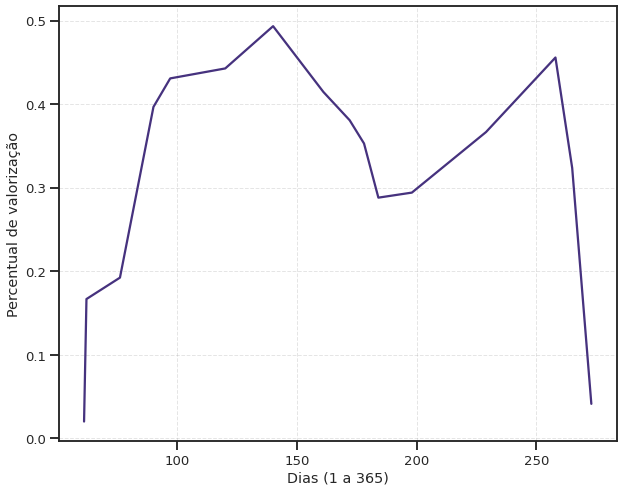

In [ ]:
plt.figure(figsize=(10, 8))
plt.xlabel("Dias (1 a 365)")
plt.ylabel("Percentual de valorização")

sns.lineplot(data=df_cond4, x="tempo_revenda", y="percentual_valorização");
plt.grid(b=True, color='gray', linestyle='--', linewidth=1);

In [ ]:
# Análise dos maiores percentuais de valorizção antes da metade do ano.
df_cond4 = df_cond4[df_cond4['tempo_revenda']<365/2]
df_cond4 = df_cond4.sort_values('percentual_valorização',ascending=False)
df_cond4.head()

,id,data,preço,quartos,banheiros,area_habitavel,tamanho_terreno,andares,condição,material_construção,ano_construção,ano_renovação,zipcode,cidade,preço_area,preço_terreno,valorização,tempo_revenda,percentual_valorização
176,4031000520,2014-11-25,227000.0,1,2.00,1150,9812,1,4,7,1962,0,98001,Auburn,197.39,23.13,112000.0,140.0,0.49
56,1446403850,2015-01-14,212000.0,2,1.00,790,7153,1,4,6,1944,0,98168,Seattle,268.35,29.64,93875.0,120.0,0.44
190,4222310010,2015-04-02,267950.0,4,1.00,1730,7350,1,4,6,1970,0,98003,Federal Way,154.88,36.46,115450.0,97.0,0.43
236,6143000020,2015-04-06,299000.0,3,1.75,1910,17003,1,4,8,1963,0,98001,Auburn,156.54,17.59,124000.0,161.0,0.41
212,5127001320,2015-02-23,314950.0,3,1.75,1520,9600,1,4,7,1967,0,98059,Renton,207.20,32.81,124950.0,90.0,0.40


# Sugestões

## Melhores Imóveis

In [ ]:
# 5 Melhores Imóveis
df_cond4 = df_cond4[['preço','quartos','banheiros','area_habitavel','tamanho_terreno','andares','condição','material_construção','ano_construção','ano_renovação','cidade','preço_area','preço_terreno','valorização','tempo_revenda','percentual_valorização']]
df_cond4.head(5)

,preço,quartos,banheiros,area_habitavel,tamanho_terreno,andares,condição,material_construção,ano_construção,ano_renovação,cidade,preço_area,preço_terreno,valorização,tempo_revenda,percentual_valorização
176,227000.0,1,2.00,1150,9812,1,4,7,1962,0,Auburn,197.39,23.13,112000.0,140.0,0.49
56,212000.0,2,1.00,790,7153,1,4,6,1944,0,Seattle,268.35,29.64,93875.0,120.0,0.44
190,267950.0,4,1.00,1730,7350,1,4,6,1970,0,Federal Way,154.88,36.46,115450.0,97.0,0.43
236,299000.0,3,1.75,1910,17003,1,4,8,1963,0,Auburn,156.54,17.59,124000.0,161.0,0.41
212,314950.0,3,1.75,1520,9600,1,4,7,1967,0,Renton,207.20,32.81,124950.0,90.0,0.40


## Piores Imóveis

In [ ]:
# 5 piores Imóveis
piores = df[['preço','quartos','banheiros','area_habitavel','tamanho_terreno','andares','condição','material_construção','ano_construção','ano_renovação','cidade','preço_area','preço_terreno','valorização','tempo_revenda','percentual_valorização']]
piores = df.sort_values('valorização',ascending=True)
piores.head(5)

,id,data,preço,quartos,banheiros,area_habitavel,tamanho_terreno,andares,condição,material_construção,ano_construção,ano_renovação,zipcode,cidade,preço_area,preço_terreno,valorização,tempo_revenda,percentual_valorização
256,7167000040,2015-03-05,700000.0,4,3.00,3350,199253,2,3,10,2004,0,98010,Black Diamond,208.96,3.51,-40000.0,204.0,-5.71e-02
124,2726049071,2015-04-08,489950.0,2,1.00,820,4206,1,3,5,1949,0,98125,Seattle,597.50,116.49,-20050.0,118.0,-4.09e-02
128,2767603612,2015-01-13,489000.0,2,2.25,1290,1334,3,3,8,2007,0,98107,Seattle,379.07,366.57,-11000.0,246.0,-2.25e-02
320,8682262400,2015-05-13,419950.0,2,1.75,1350,4003,1,3,8,2004,0,98053,Redmond,311.07,104.91,-10050.0,299.0,-2.39e-02
118,2619920170,2014-12-19,765000.0,4,2.50,3230,4290,2,3,9,2004,0,98033,Kirkland,236.84,178.32,-7500.0,79.0,-9.80e-03
